<a href="https://colab.research.google.com/github/BartBroux/BartBroux/blob/main/rollend_gemiddelde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe

import scipy.stats as stats                         # Statistical tests
from sklearn.linear_model import LinearRegression   # Linear regression model

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

In [10]:
# Import the CSV-file in a DataFrame, parse the Date column as a date and set it as the index.
data = pd.read_csv('https://raw.githubusercontent.com/BartBroux/Hogent/main/DSAI/Werkruimte/GitHub/data/IWDA.AS%20(2).csv?token=GHSAT0AAAAAACTWKLEA6E3MM4AOOBZFZABSZVP4GDA', delimiter = ",", parse_dates=['Date']).set_index(['Date'])
#  We will only use the variable Close, so you can drop all other variables.
data = data[['Close']]
data.head()

,Close
Date,
2009-09-28,16.99
2009-09-29,16.99
2009-09-30,16.99
2009-10-01,16.99
2009-10-02,16.99


Text(0, 0.5, 'Close')

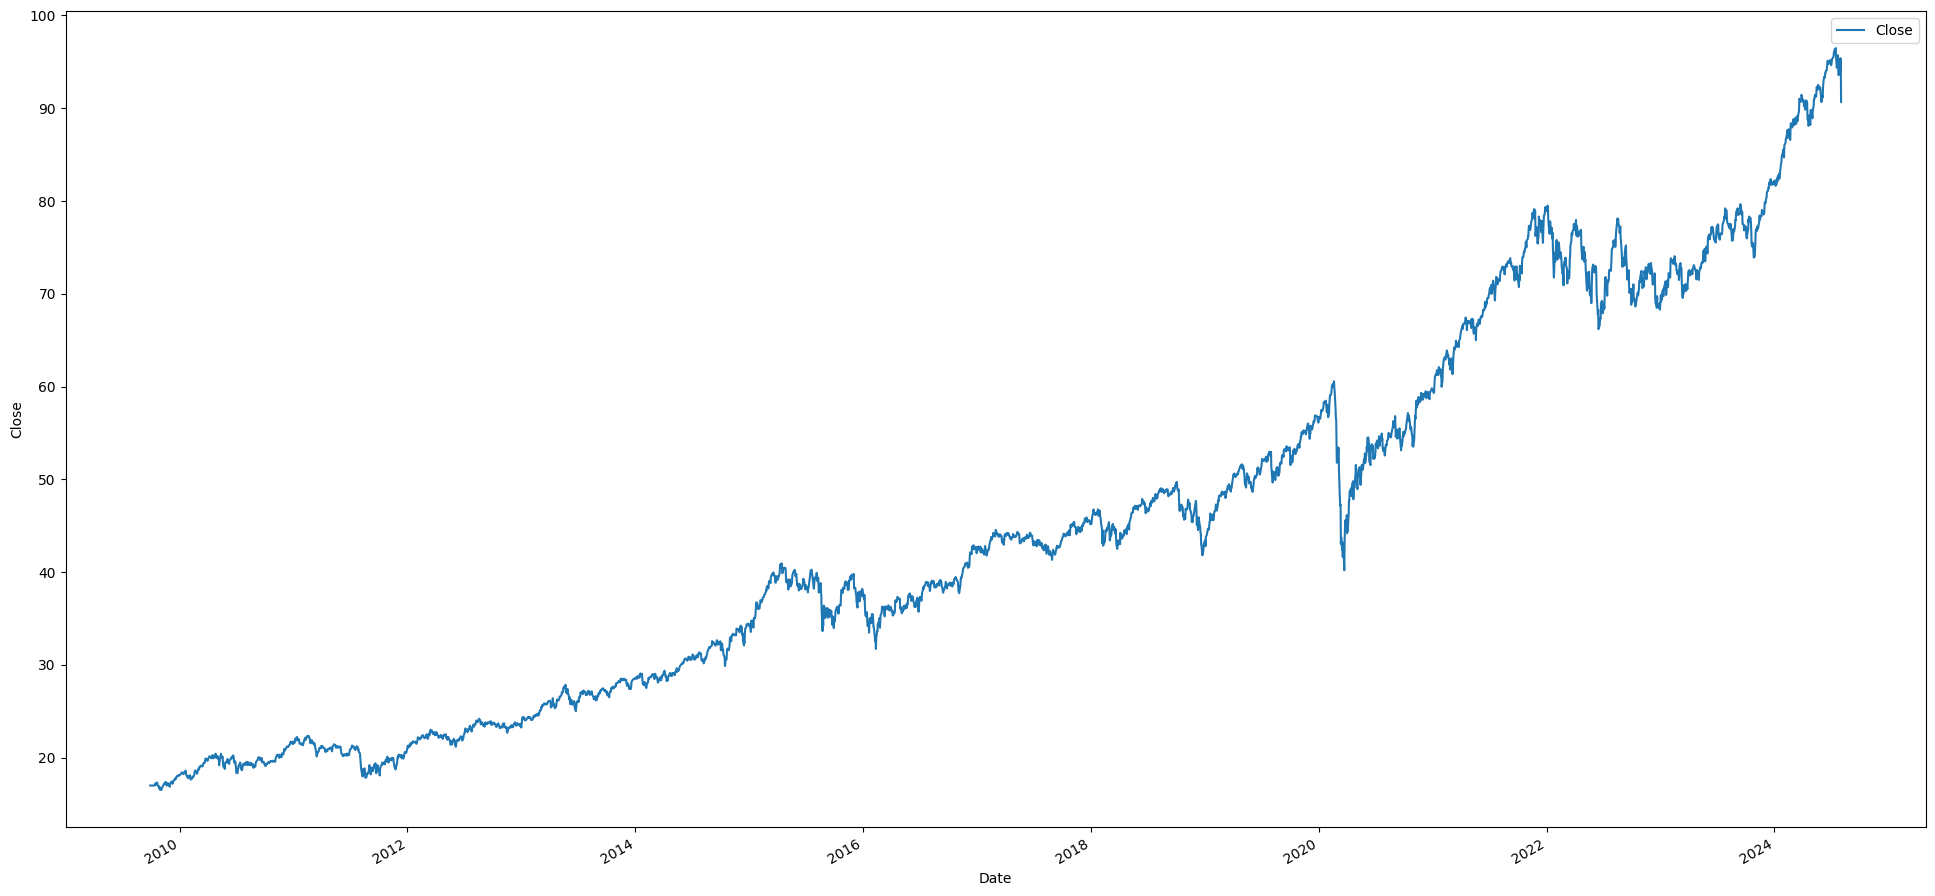

In [11]:
# Plot the time series to get an idea about the evolution over time of the S&P500 index.
data.plot(y= data.columns[0], figsize= [24,12])
plt.ylabel(data.columns[0])

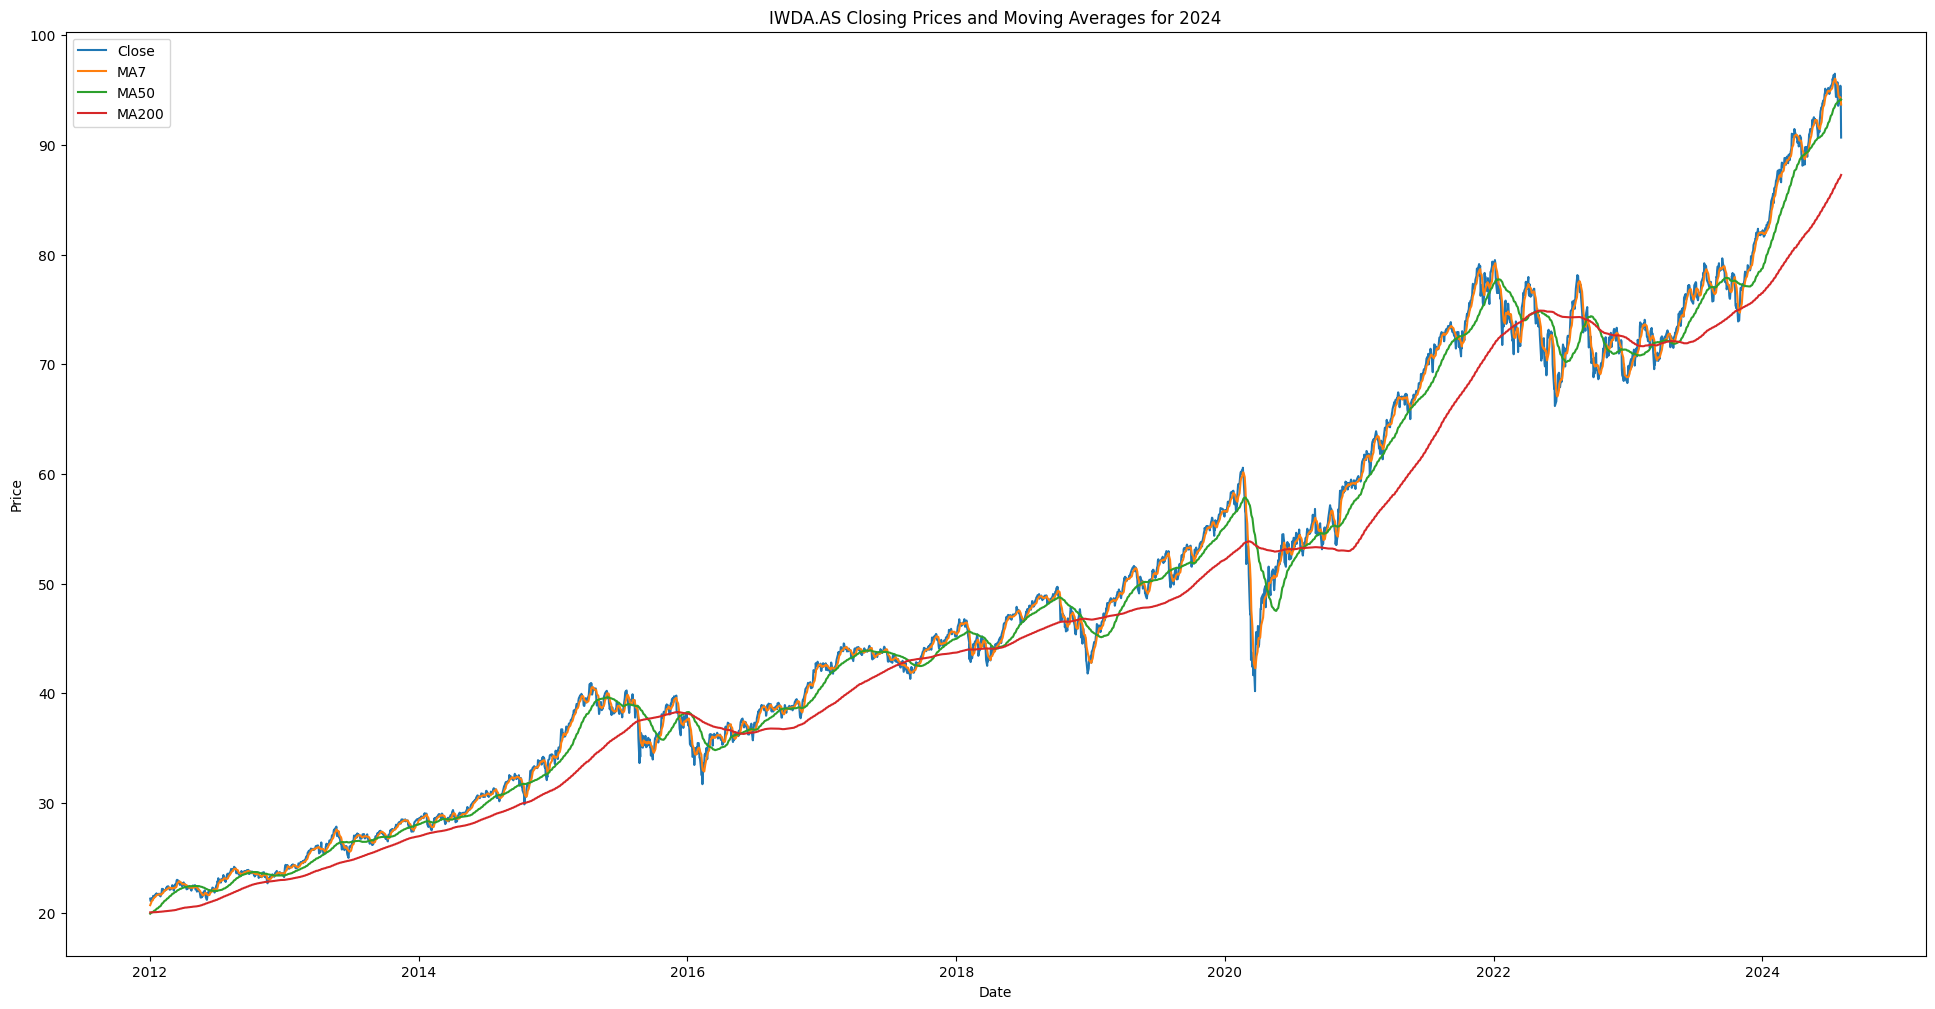

In [14]:
data['MA7'] = data['Close'].rolling(7).mean()
data['MA50'] = data['Close'].rolling(50).mean()
data['MA200'] = data['Close'].rolling(200).mean()

# Filter data for the year 2024
data_2024 = data.loc['2012':'2024']

# Plot the data
plt.figure(figsize=[24, 12])
plt.plot(data_2024.index, data_2024['Close'], label='Close')
plt.plot(data_2024.index, data_2024['MA7'], label='MA7')
plt.plot(data_2024.index, data_2024['MA50'], label='MA50')
plt.plot(data_2024.index, data_2024['MA200'], label='MA200')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('IWDA.AS Closing Prices and Moving Averages for 2024')
plt.legend()
plt.show()